<img src="http://openenergy-platform.org/static/OEP_logo_2_no_text.svg" alt="OpenEnergy Platform" height="100" width="100"  align="left"/>

# Open Energy Platform
<br><br>

## Download MaStR and Aggregate on Subregions
Repository: https://github.com/openego/oedialect

Please report bugs and improvements here: https://github.com/OpenEnergyPlatform/oedialect/issues <br>
Using SAIO functions to setup SqlAlchemy classes: https://github.com/coroa/saio

In [1]:
__copyright__ = "Reiner Lemoine Institut"
__license__   = "GNU Affero General Public License Version 3 (AGPL-3.0)"
__url__       = "https://github.com/openego/data_processing/blob/master/LICENSE"
__author__    = "Ludee, Izzet"

In [2]:
import oedialect
import saio
import sqlalchemy as sa
from sqlalchemy.orm import sessionmaker

import pandas as pd
import numpy as np
import getpass

import matplotlib.pyplot as plt
from matplotlib import collections
import geopandas as gpd
from geopandas.tools import sjoin

%matplotlib inline

## Connection to OEP

We first need to connect to the OEP, using our user name and token. <br>
Note: You ca view your token on your OEP profile page after logging in.

In [3]:
# White spaces in the username are fine!
user = input('Enter OEP-username:')
token = getpass.getpass('Token:')

Enter OEP-username:Christian Hofmann
Token:········


Create an SQLAlchemy engine. <br>
The engine is what 'speaks' oedialect to the database API. We need to tell it where the database is and pass our credentials.


In [4]:
# Create Engine:
oep_url = 'openenergy-platform.org' #'193.175.187.164' #'oep.iks.cs.ovgu.de'
oed = f'postgresql+oedialect://{user}:{token}@{oep_url}'

engine = sa.create_engine(oed)
metadata = sa.MetaData(bind=engine)
print(metadata)

MetaData(bind=Engine(postgresql+oedialect://Christian Hofmann:***@openenergy-platform.org))


## Setup ORM

Retrieve the [Object-relational mapping (ORM)](https://en.wikipedia.org/wiki/Object-relational_mapping) from the OEP.

In [5]:
saio.register_schema("boundaries", engine)
saio.register_schema("model_draft", engine)
saio.register_schema("supply", engine)
saio.register_schema("grid", engine)

## Download data from OEP

### Bundesländer & Kreise & Gemeinden

In [6]:
from saio.boundaries import bkg_vg250_2_lan as BkgVg250Lan
from saio.boundaries import bkg_vg250_4_krs as BkgVg250Krs
from saio.boundaries import bkg_vg250_6_gem as BkgVg250Gem

In [7]:
Session = sessionmaker(bind=engine)
session = Session()
try:
    df_lan = saio.as_pandas(session.query(BkgVg250Lan))
    df_krs = saio.as_pandas(session.query(BkgVg250Krs))
    df_gem = saio.as_pandas(session.query(BkgVg250Gem))
    session.commit()
    print('Querry successful!')
except Exception as e:
    session.rollback()
    raise
    print('Querry incomplete!')
finally:
    session.close()

Querry successful!


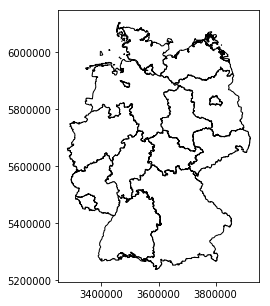

In [8]:
ax = df_lan.plot(figsize=(5, 5), color='white', edgecolor='black')

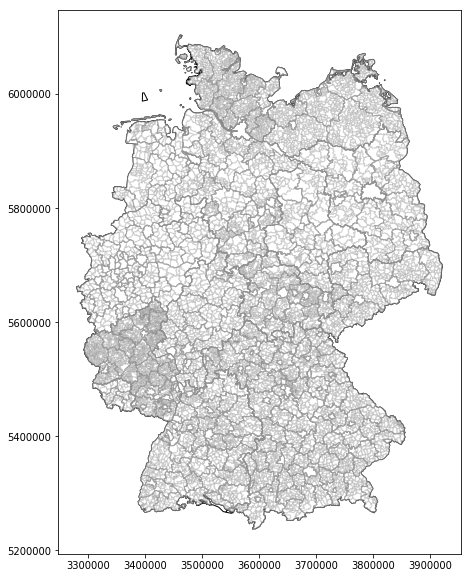

In [9]:
ax = df_lan.plot(figsize=(10, 10), color='white', edgecolor='black')
df_krs.plot(ax=ax, alpha=0.5, color='white', edgecolor='grey')
df_gem.plot(ax=ax, alpha=0.2, color='white', edgecolor='grey')

In [10]:
df_lan

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom
0,2016-01-01,1,2.0,4.0,1.0,10,10,100410100100,Saarland,Land,...,00,00,000,0,DEC,100000000000,10000000,2009-01-01,DEBKGDL20000E5E3,"(POLYGON ((3359860.55204577 5501116.386107582,..."
1,2016-01-01,2,2.0,4.0,1.0,08,08,081110000000,Baden-Württemberg,Land,...,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603,(POLYGON ((3546990.992391724 5516203.220514765...
2,2016-01-01,3,2.0,4.0,1.0,05,05,051110000000,Nordrhein-Westfalen,Land,...,00,00,000,0,DEA,050000000000,05000000,2009-11-01,DEBKGDL20000E6GR,(POLYGON ((3477670.595567964 5820656.544755518...
3,2016-01-01,5,2.0,4.0,1.0,04,04,040110000000,Bremen,Freie Hansestadt,...,00,00,000,0,DE5,040000000000,04000000,2010-01-01,DEBKGDL20000E0SF,"(POLYGON ((3466988.2026138 5899769.937047021, ..."
4,2016-01-01,6,2.0,4.0,1.0,06,06,064140000000,Hessen,Land,...,00,00,000,0,DE7,060000000000,06000000,2015-01-01,DEBKGDL20000E3LK,"(POLYGON ((3534329.21459198 5723671.60067475, ..."
5,2016-01-01,7,2.0,4.0,1.0,12,12,120540000000,Brandenburg,Land,...,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675,(POLYGON ((3818085.728837033 5947040.865919339...
6,2016-01-01,8,2.0,4.0,1.0,03,03,032410001001,Niedersachsen,Land,...,00,00,000,0,DE9,030000000000,03000000,2015-01-01,DEBKGDL20000E6EW,(POLYGON ((3479512.889185849 5973250.388275424...
7,2016-01-01,9,2.0,4.0,1.0,13,13,130040000000,Mecklenburg-Vorpommern,Land,...,00,00,000,0,DE8,130000000000,13000000,2014-11-01,DEBKGDL20000004A,(POLYGON ((3728408.027961383 6045375.809811609...
8,2016-01-01,10,2.0,4.0,1.0,07,07,073150000000,Rheinland-Pfalz,Land,...,00,00,000,0,DEB,070000000000,07000000,2004-01-01,DEBKGDL20000E6ZO,(POLYGON ((3416345.666028273 5645512.889753469...
9,2016-01-01,11,2.0,4.0,1.0,11,11,110000000000,Berlin,Land,...,00,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5,"(POLYGON ((3802758.415380709 5846732.99559591,..."


## Select Region

### Bundesland

In [11]:
lan_name_b = 'Berlin'
lan_name_bb = 'Brandenburg'
df_lan_region = df_lan[(df_lan['gen'] == lan_name_b) | (df_lan['gen'] == lan_name_bb)]

In [12]:
ags_b = df_lan_region.loc[df_lan_region['gen'] == lan_name_b, ['ags']].values[0][0]
print('Region: {} - AGS: {}'.format(lan_name_b, ags_b))
ags_bb = df_lan_region.loc[df_lan_region['gen'] == lan_name_bb, ['ags']].values[0][0]
print('Region: {} - AGS: {}'.format(lan_name_bb, ags_bb))

Region: Berlin - AGS: 11
Region: Brandenburg - AGS: 12


In [13]:
df_lan_region

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom
5,2016-01-01,7,2.0,4.0,1.0,12,12,120540000000,Brandenburg,Land,...,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675,(POLYGON ((3818085.728837033 5947040.865919339...
9,2016-01-01,11,2.0,4.0,1.0,11,11,110000000000,Berlin,Land,...,00,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5,"(POLYGON ((3802758.415380709 5846732.99559591,..."


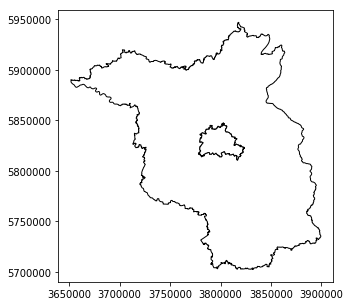

In [14]:
ax = df_lan_region.plot(figsize=(5, 5), color='white', edgecolor='black')

### Landkreis

In [15]:
df_krs_region = df_krs.loc[(df_krs['ags'].str.slice(0,2) == str(ags_b)) | (df_krs['ags'].str.slice(0,2) == str(ags_bb))]
df_krs_region

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom
2,2016-01-01,3,4.0,4.0,1.0,12070,12070,120700296296,Prignitz,Landkreis,...,00,00,000,R,DE40F,120700000000,12070000,2009-01-01,DEBKGDL20000E46W,"(POLYGON ((3703944.24316605 5919784.721841077,..."
5,2016-01-01,5,4.0,4.0,1.0,12073,12073,120730452452,Uckermark,Landkreis,...,00,00,000,R,DE40I,120730000000,12073000,2009-01-01,DEBKGDL20000E3N7,(POLYGON ((3818085.728837033 5947040.865919339...
8,2016-01-01,8,4.0,4.0,1.0,12068,12068,120680320320,Ostprignitz-Ruppin,Landkreis,...,00,00,000,R,DE40D,120680000000,12068000,2011-01-01,DEBKGDL20000E6H2,(POLYGON ((3724013.553194613 5913719.852678966...
12,2016-01-01,12,4.0,4.0,1.0,12071,12071,120710076076,Spree-Neiße,Landkreis,...,00,00,000,R,DE40G,120710000000,12071000,2009-01-01,DEBKGDL20000E27W,(POLYGON ((3877310.881325857 5778448.347510678...
15,2016-01-01,15,4.0,4.0,1.0,12066,12066,120660304304,Oberspreewald-Lausitz,Landkreis,...,00,00,000,R,DE40B,120660000000,12066000,2009-01-01,DEBKGDL20000E6ZP,"(POLYGON ((3839206.14659038 5763213.917712811,..."
47,2016-01-01,43,4.0,4.0,1.0,12069,12069,120690020020,Potsdam-Mittelmark,Landkreis,...,00,00,000,R,DE40E,120690000000,12069000,2014-09-11,DEBKGDL20000E00C,(POLYGON ((3736598.657110624 5830546.852987512...
86,2016-01-01,82,4.0,4.0,1.0,12067,12067,120670036036,Oder-Spree,Landkreis,...,00,00,000,R,DE40C,120670000000,12067000,2015-01-19,DEBKGDL20000E0J4,(POLYGON ((3852309.714042489 5831071.872889126...
91,2016-01-01,116,4.0,4.0,1.0,12062,12062,120620224224,Elbe-Elster,Landkreis,...,00,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F,"(POLYGON ((3789268.9109353 5757920.743505468, ..."
99,2016-01-01,317,4.0,4.0,1.0,12061,12061,120610316316,Dahme-Spreewald,Landkreis,...,00,00,000,R,DE406,120610000000,12061000,2015-01-19,DEBKGDL20000E6HD,(POLYGON ((3804876.473015278 5816692.865425699...
117,2016-01-01,145,4.0,4.0,1.0,12060,12060,120600052052,Barnim,Landkreis,...,00,00,000,R,DE405,120600000000,12060000,2009-01-01,DEBKGDL20000E0B1,(POLYGON ((3825895.967910118 5891516.139354819...


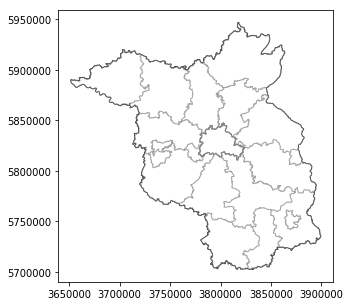

In [16]:
ax = df_lan_region.plot(figsize=(5, 5), color='white', edgecolor='black')
df_krs_region.plot(ax=ax, alpha=0.5, color='white', edgecolor='grey')

### Gemeinde

In [17]:
df_gem_region = df_gem.loc[(df_gem['ags'].str.slice(0,2) == str(ags_b)) | (df_gem['ags'].str.slice(0,2) == str(ags_bb))]
df_gem_region

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom
194,2016-01-01,173,6.0,4.0,1.0,120620024024,12062024,120620024024,Bad Liebenwerda,Stadt,...,00,24,024,R,DE407,120620024024,12062024,2009-01-01,DEBKGDL20000E68A,(POLYGON ((3811618.776418203 5722365.241818016...
204,2016-01-01,182,6.0,4.0,1.0,120705006280,12070280,120705006280,Meyenburg,Stadt,...,50,06,280,R,DE40F,120705006280,12070280,2009-01-01,DEBKGDL20000E0BV,(POLYGON ((3717089.243577976 5915303.920883838...
205,2016-01-01,183,6.0,4.0,1.0,120705006153,12070153,120705006153,Halenbeck-Rohlsdorf,Gemeinde,...,50,06,153,R,DE40F,120705006153,12070153,2009-01-01,DEBKGDL20000E0BT,(POLYGON ((3718834.245492619 5909462.713774593...
209,2016-01-01,186,6.0,4.0,1.0,120625207240,12062240,120625207240,Hohenleipisch,Gemeinde,...,52,07,240,R,DE407,120625207240,12062240,2009-01-01,DEBKGDL20000E2NT,(POLYGON ((3816445.353457158 5720906.802318151...
247,2016-01-01,222,6.0,4.0,1.0,120695910402,12069402,120695910402,Mühlenfließ,Gemeinde,...,59,10,402,R,DE40E,120695910402,12069402,2009-01-01,DEBKGDL20000E21Y,(POLYGON ((3763173.707063624 5790849.239387363...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11354,2016-01-01,11352,6.0,4.0,1.0,120640380380,12064380,120640380380,Petershagen/Eggersdorf,Gemeinde,...,03,80,380,R,DE409,120640380380,12064380,2009-01-01,DEBKGDL20000E2IR,(POLYGON ((3828303.399674848 5835508.170552222...
11356,2016-01-01,11355,6.0,4.0,1.0,120695902460,12069460,120695902460,Päwesin,Gemeinde,...,59,02,460,R,DE40E,120695902460,12069460,2009-01-01,DEBKGDL20000E2ZK,(POLYGON ((3751456.619110811 5830174.069262207...
11357,2016-01-01,11365,6.0,4.0,1.0,120640227227,12064227,120640227227,Hoppegarten,Gemeinde,...,02,27,227,R,DE409,120640227227,12064227,2009-01-01,DEBKGDL20000E04Y,(POLYGON ((3818225.312052303 5829158.336924177...
11397,2016-01-01,11396,6.0,4.0,1.0,120615108344,12061344,120615108344,Münchehofe,Gemeinde,...,51,08,344,R,DE406,120615108344,12061344,2009-01-01,DEBKGDL20000E483,(POLYGON ((3826652.121714145 5795105.621644203...


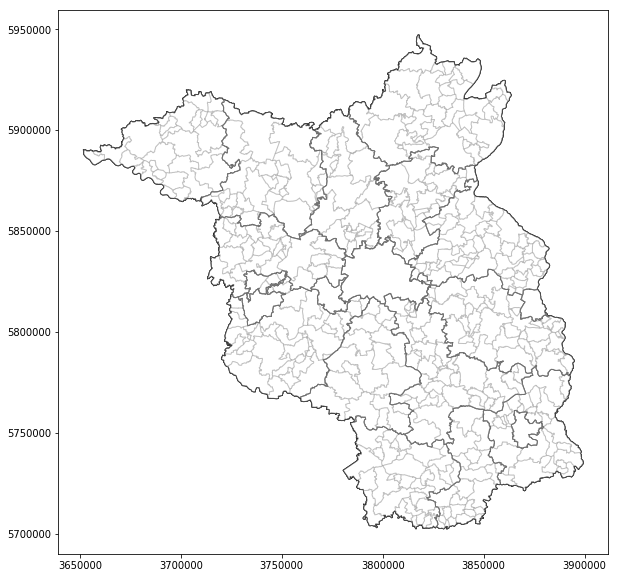

In [18]:
ax = df_lan_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_krs_region.plot(ax=ax, alpha=0.8, color='white', edgecolor='black')
df_gem_region.plot(ax=ax, alpha=0.3, color='white', edgecolor='grey')

### MaStR

In [19]:
from saio.model_draft import bnetza_mastr_rli_v2_2_0_wind_clean as MastrWind
from saio.model_draft import bnetza_mastr_rli_v2_2_0_hydro_clean as MastrHydro
from saio.model_draft import bnetza_mastr_rli_v2_2_0_biomass_clean as MastrBiomass

Data: https://openenergy-platform.org/dataedit/view/model_draft/bnetza_mastr_rli_v2_2_0_wind_clean

In [20]:
Session = sessionmaker(bind=engine)
session = Session()
try:
    df_mastr_wind = saio.as_pandas(session.query(MastrWind))
    #df_mastr_hydro = saio.as_pandas(session.query(MastrHydro))
    #df_mastr_biomass = saio.as_pandas(session.query(MastrBiomass))
    session.commit()
    print('Querry successful!')
except Exception as e:
    session.rollback()
    raise
    print('Querry incomplete!')
finally:
    session.close()

Querry successful!


(3206705.5376885096, 9653036.469116997, -2061691.1759842124, 4805751.443931205)

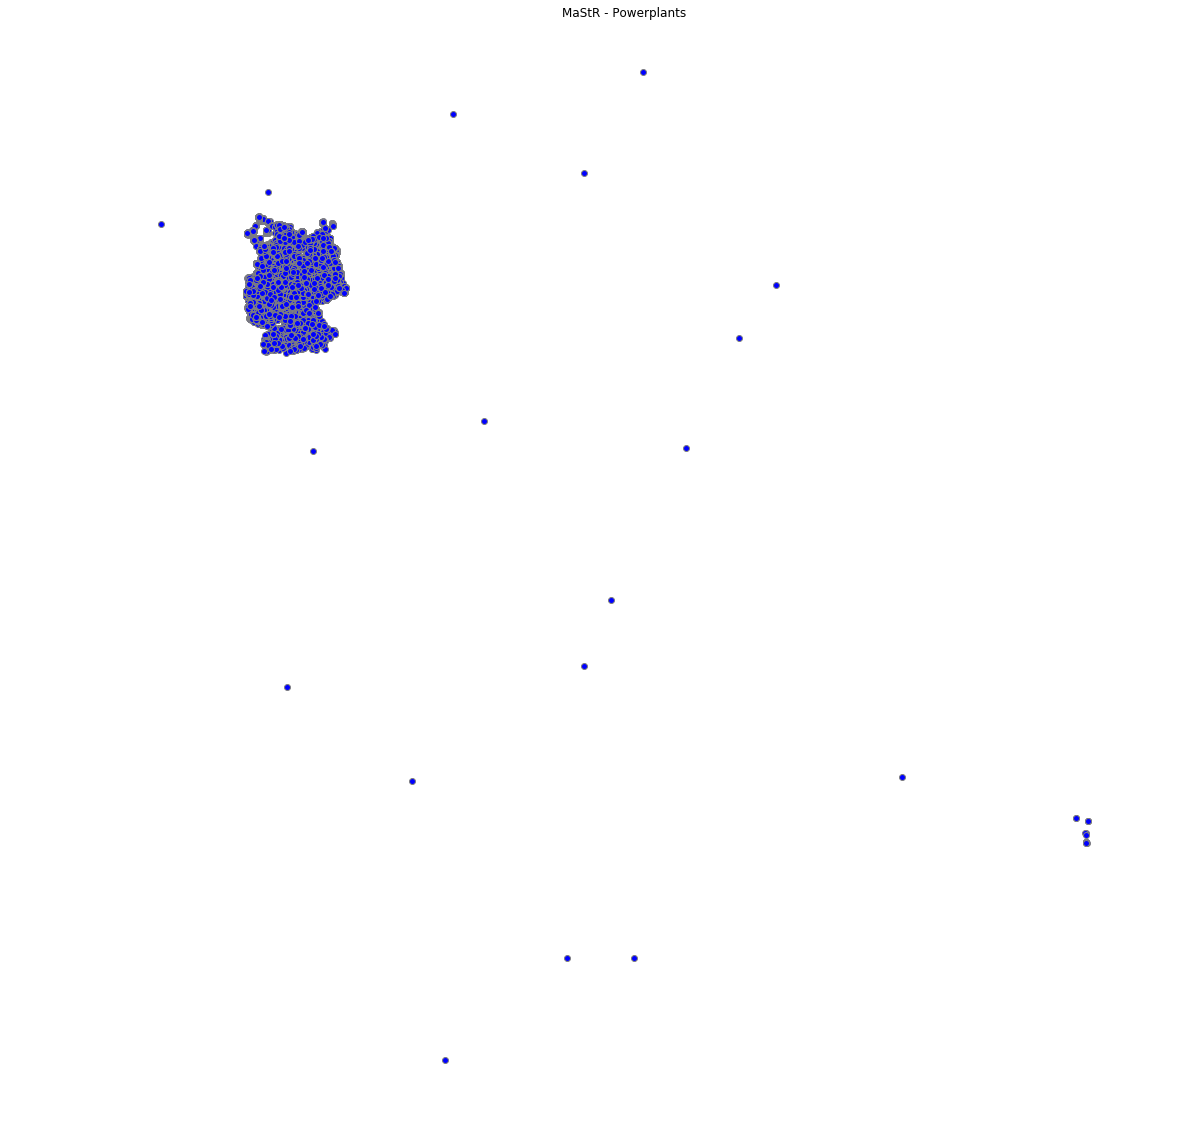

In [21]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('MaStR - Powerplants')

df_mastr_wind.to_crs({'init': 'epsg:3035'}).plot(ax=ax, color='blue', edgecolor='grey', linewidth=1)

#df_mastr_hydro.to_crs({'init': 'epsg:3035'}).plot(ax=ax, color='white', alpha=.5, edgecolor='black', linewidth=2)

#df_mastr_biomass.to_crs({'init': 'epsg:3035'}).plot(ax=ax, marker='o', color='orange', markersize=5)

plt.axis('equal')

### Data Cleansing

In [22]:
type(df_mastr_wind)

geopandas.geodataframe.GeoDataFrame

In [23]:
df_mastr_wind.Bruttoleistung = df_mastr_wind.Bruttoleistung.astype(float)
df_mastr_wind

,id,w-id,pu-id,lid,EinheitMastrNummer,Name,Einheitart,Einheittyp,Standort,Bruttoleistung,...,Frist,WasserrechtsNummer,WasserrechtAblaufdatum,Meldedatum_p,version_m,timestamp_m,lat,lon,geom,comment
0,4339,4338,1073575,1575,SME977268638521,AB41,Stromerzeugungseinheit,Windeinheit,Ostsee Cluster:,6300.0,...,2017-07-31,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,NaN,NaN,POINT (8.867222155442741 54.74936746915184),make_geom_standort_plz;
1,4340,4339,1073576,1576,SME977404216101,AB42,Stromerzeugungseinheit,Windeinheit,Ostsee Cluster:,6300.0,...,2017-07-31,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,NaN,NaN,POINT (8.867222155442741 54.74936746915184),make_geom_standort_plz;
2,4341,4340,1073577,1577,SME945270847446,AB47,Stromerzeugungseinheit,Windeinheit,Ostsee Cluster:,6300.0,...,2017-07-31,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,NaN,NaN,POINT (8.867222155442741 54.74936746915184),make_geom_standort_plz;
3,4342,4341,1073578,1578,SME921631191304,AB48,Stromerzeugungseinheit,Windeinheit,Ostsee Cluster:,6300.0,...,2017-07-31,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,NaN,NaN,POINT (8.867222155442741 54.74936746915184),make_geom_standort_plz;
4,4343,4342,1073579,1579,SME998042407225,AB52,Stromerzeugungseinheit,Windeinheit,Ostsee Cluster:,6300.0,...,2017-07-31,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,NaN,NaN,POINT (8.867222155442741 54.74936746915184),make_geom_standort_plz;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41552,40817,40816,2388266,266,SEE954788853719,WEA 1,Stromerzeugungseinheit,Windeinheit,97720 NÃ¼dlingen,2400.0,...,2017-01-02,None,None,2019-08-12,rli_v2.2.0,2019-12-06 21:36:30.301709,39.450817,15.764019,POINT (10.13555747995853 50.21887306767787),make_geom; has_geom; outside_vg250_onshore; re...
41553,40821,40820,2388373,373,SEE908658847421,WEA 2,Stromerzeugungseinheit,Windeinheit,97720 NÃ¼dlingen,2400.0,...,2017-01-02,None,None,2019-08-12,rli_v2.2.0,2019-12-06 21:36:30.301709,39.446727,15.765612,POINT (10.13555747995853 50.21887306767787),make_geom; has_geom; outside_vg250_onshore; re...
41554,40936,40935,2394598,598,SEE920276062475,Dedensen,Stromerzeugungseinheit,Windeinheit,30926 Seelze,750.0,...,None,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,48.116464,19.099712,POINT (9.574776673222841 52.38602909672576),make_geom; has_geom; outside_vg250_onshore; re...
41555,41552,41551,2432758,758,SEE930963621908,9121,Stromerzeugungseinheit,Windeinheit,Osterhammerweg 26553 Dornum,500.0,...,None,None,None,None,rli_v2.2.0,2019-12-06 21:36:30.301709,53.000000,7.000000,POINT (7.418378945642694 53.65611687321466),make_geom; has_geom; outside_vg250_onshore; re...


## Spatial Join & Aggregation

https://gis.stackexchange.com/questions/102933/more-efficient-spatial-join-in-python-without-qgis-arcgis-postgis-etc/165413#165413

In [24]:
# CRS
print(df_mastr_wind.crs)
print(df_lan_region.crs)
print(df_krs_region.crs)
print(df_gem_region.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:31467'}
{'init': 'epsg:31467'}
{'init': 'epsg:31467'}


### Bundesland

In [25]:
df_mastr_wind_region_lan = sjoin(df_mastr_wind.to_crs({'init': 'epsg:31467'}), df_lan_region, how='inner', op='within')
df_mastr_wind_region_lan

,id_left,w-id,pu-id,lid,EinheitMastrNummer,Name,Einheitart,Einheittyp,Standort,Bruttoleistung,...,sn_k,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id
2634,22628,22627,1425430,1430,SME987037019017,None,Stromerzeugungseinheit,Windeinheit,Am Teich 1 03238 GÃ¶llnitz,600.0,...,00,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675
3585,23526,23525,1428222,222,SME929886757269,None,Stromerzeugungseinheit,Windeinheit,Am Umspannwerk 1 01983 GroÃŸrÃ¤schen,1500.0,...,00,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675
3639,816,815,2387,387,SME978025001589,WEA 3-44604,Stromerzeugungseinheit,Windeinheit,Karl-Marx-StraÃŸe 29X 03205 Calau,3000.0,...,00,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675
3734,670,669,2234,234,SME928772051382,WEA 2,Stromerzeugungseinheit,Windeinheit,Windpark 901 03249 Sonnewalde,2000.0,...,00,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675
3735,673,672,2241,241,SME925180084681,02 M2 - 82025,Stromerzeugungseinheit,Windeinheit,An der B 115 901 03226 Vetschau,2500.0,...,00,00,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,6046,6045,1125052,1052,SME948848118078,WEA 2,Stromerzeugungseinheit,Windeinheit,10557 Berlin,1.2,...,00,00,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5
23670,4354,4353,1073597,1597,SME945538160720,Elpro KWEA,Stromerzeugungseinheit,Windeinheit,13053 Berlin,10.0,...,00,00,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5
23691,4308,4307,1073480,1480,SME982433894183,BSR-Anlage Gen2,Stromerzeugungseinheit,Windeinheit,12681 Berlin,15.0,...,00,00,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5
23855,6044,6043,1125050,1050,SME981818024276,WEA 1,Stromerzeugungseinheit,Windeinheit,10557 Berlin,1.2,...,00,00,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5


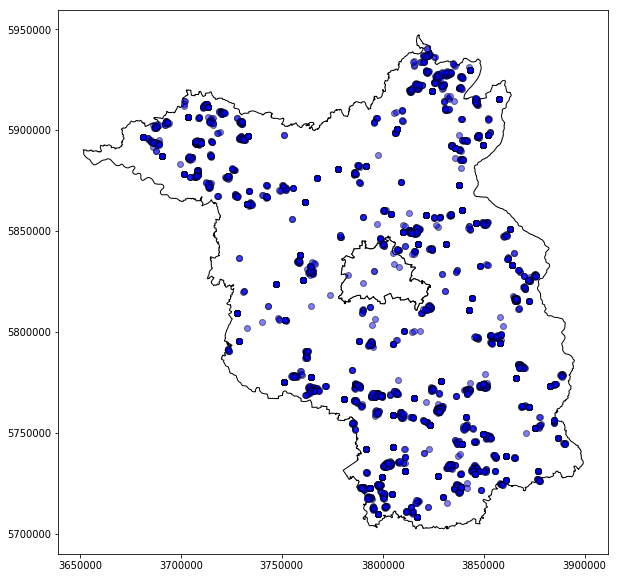

In [26]:
ax = df_lan_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_mastr_wind_region_lan.plot(ax=ax, alpha=0.5, color='blue', edgecolor='black')

In [27]:
df_agg = df_mastr_wind_region_lan.groupby('ags_0')['Bruttoleistung'].sum()
df_lan_region_sum = df_lan_region.join(df_agg, on='ags_0')
df_lan_region_sum

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom,Bruttoleistung
5,2016-01-01,7,2.0,4.0,1.0,12,12,120540000000,Brandenburg,Land,...,00,000,0,DE4,120000000000,12000000,1999-01-20,DEBKGDL20000E675,(POLYGON ((3818085.728837033 5947040.865919339...,9452036.85
9,2016-01-01,11,2.0,4.0,1.0,11,11,110000000000,Berlin,Land,...,00,000,0,DE3,110000000000,11000000,1990-10-03,DEBKGDL20000E0P5,"(POLYGON ((3802758.415380709 5846732.99559591,...",20126.90


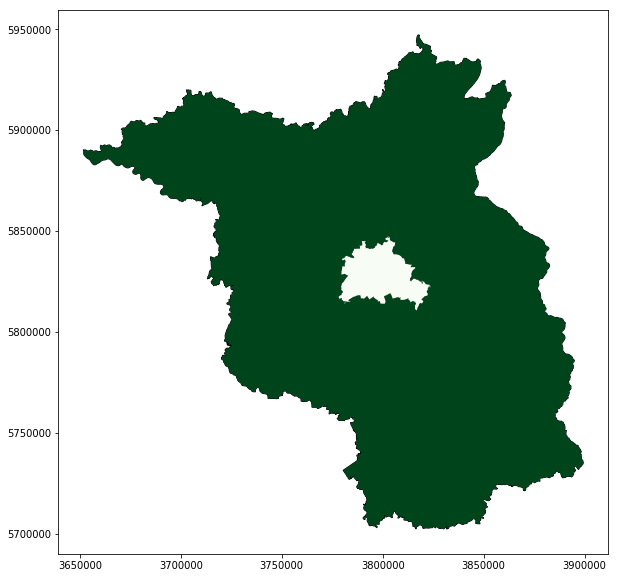

In [28]:
ax = df_lan_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_lan_region_sum.plot(column='Bruttoleistung', cmap='Greens', label='Capacity in MW', ax=ax)

### Landkreis

In [29]:
df_mastr_wind_region_krs = sjoin(df_mastr_wind.to_crs({'init': 'epsg:31467'}), df_krs_region, how='inner', op='within')
df_mastr_wind_region_krs.head()

,id_left,w-id,pu-id,lid,EinheitMastrNummer,Name,Einheitart,Einheittyp,Standort,Bruttoleistung,...,sn_k,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id
2634,22628,22627,1425430,1430,SME987037019017,None,Stromerzeugungseinheit,Windeinheit,Am Teich 1 03238 GÃ¶llnitz,600.0,...,62,00,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F
3734,670,669,2234,234,SME928772051382,WEA 2,Stromerzeugungseinheit,Windeinheit,Windpark 901 03249 Sonnewalde,2000.0,...,62,00,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F
3773,993,992,2575,575,SME929654960259,WEA L11,Stromerzeugungseinheit,Windeinheit,Windpark 907 03238 Lieskau,3450.0,...,62,00,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F
3774,994,993,2576,576,SME946909699108,WEA L12,Stromerzeugungseinheit,Windeinheit,Windpark 908 03238 Lieskau,3450.0,...,62,00,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F
3775,995,994,2577,577,SME987673586232,WEA L13,Stromerzeugungseinheit,Windeinheit,Windpark 909 03238 Lieskau,3450.0,...,62,00,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F


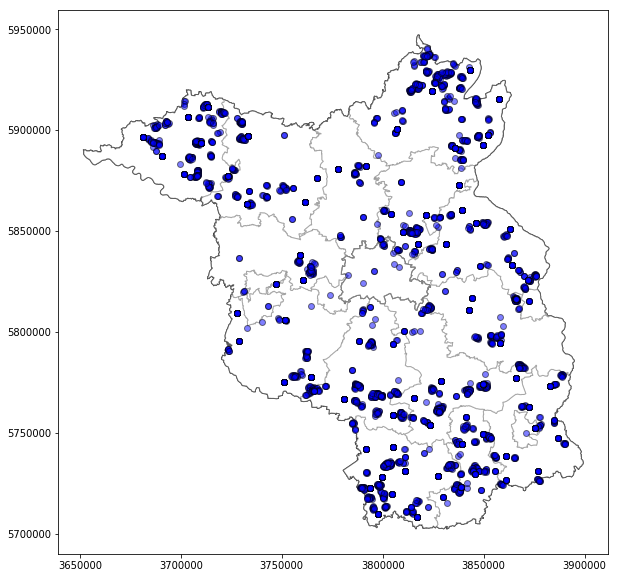

In [30]:
ax = df_lan_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_krs_region.plot(ax=ax, alpha=0.5, color='white', edgecolor='grey')
df_mastr_wind_region_krs.plot(ax=ax, alpha=0.5, color='blue', edgecolor='black')

In [31]:
df_agg = df_mastr_wind_region_krs.groupby('ags_0')['Bruttoleistung'].sum()
df_krs_region_sum = df_krs_region.join(df_agg, on='ags_0')
df_krs_region_sum

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom,Bruttoleistung
2,2016-01-01,3,4.0,4.0,1.0,12070,12070,120700296296,Prignitz,Landkreis,...,00,000,R,DE40F,120700000000,12070000,2009-01-01,DEBKGDL20000E46W,"(POLYGON ((3703944.24316605 5919784.721841077,...",1207391.00
5,2016-01-01,5,4.0,4.0,1.0,12073,12073,120730452452,Uckermark,Landkreis,...,00,000,R,DE40I,120730000000,12073000,2009-01-01,DEBKGDL20000E3N7,(POLYGON ((3818085.728837033 5947040.865919339...,1468882.60
8,2016-01-01,8,4.0,4.0,1.0,12068,12068,120680320320,Ostprignitz-Ruppin,Landkreis,...,00,000,R,DE40D,120680000000,12068000,2011-01-01,DEBKGDL20000E6H2,(POLYGON ((3724013.553194613 5913719.852678966...,654126.00
12,2016-01-01,12,4.0,4.0,1.0,12071,12071,120710076076,Spree-Neiße,Landkreis,...,00,000,R,DE40G,120710000000,12071000,2009-01-01,DEBKGDL20000E27W,(POLYGON ((3877310.881325857 5778448.347510678...,351709.70
15,2016-01-01,15,4.0,4.0,1.0,12066,12066,120660304304,Oberspreewald-Lausitz,Landkreis,...,00,000,R,DE40B,120660000000,12066000,2009-01-01,DEBKGDL20000E6ZP,"(POLYGON ((3839206.14659038 5763213.917712811,...",516739.75
47,2016-01-01,43,4.0,4.0,1.0,12069,12069,120690020020,Potsdam-Mittelmark,Landkreis,...,00,000,R,DE40E,120690000000,12069000,2014-09-11,DEBKGDL20000E00C,(POLYGON ((3736598.657110624 5830546.852987512...,441910.00
86,2016-01-01,82,4.0,4.0,1.0,12067,12067,120670036036,Oder-Spree,Landkreis,...,00,000,R,DE40C,120670000000,12067000,2015-01-19,DEBKGDL20000E0J4,(POLYGON ((3852309.714042489 5831071.872889126...,365838.00
91,2016-01-01,116,4.0,4.0,1.0,12062,12062,120620224224,Elbe-Elster,Landkreis,...,00,000,R,DE407,120620000000,12062000,2009-01-01,DEBKGDL20000E10F,"(POLYGON ((3789268.9109353 5757920.743505468, ...",885791.50
99,2016-01-01,317,4.0,4.0,1.0,12061,12061,120610316316,Dahme-Spreewald,Landkreis,...,00,000,R,DE406,120610000000,12061000,2015-01-19,DEBKGDL20000E6HD,(POLYGON ((3804876.473015278 5816692.865425699...,784241.70
117,2016-01-01,145,4.0,4.0,1.0,12060,12060,120600052052,Barnim,Landkreis,...,00,000,R,DE405,120600000000,12060000,2009-01-01,DEBKGDL20000E0B1,(POLYGON ((3825895.967910118 5891516.139354819...,460639.60


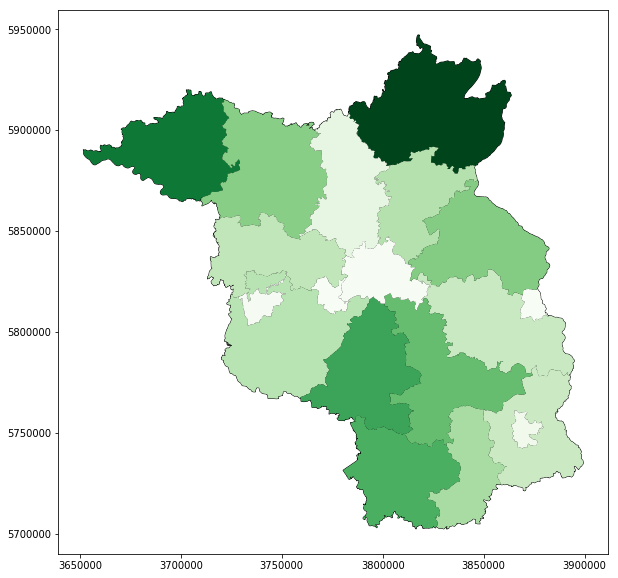

In [32]:
ax = df_krs_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_krs_region_sum.plot(column='Bruttoleistung', cmap='Greens', label='Capacity in MW', ax=ax)

### Gemeinde

In [33]:
df_mastr_wind_region_gem = sjoin(df_mastr_wind.to_crs({'init': 'epsg:31467'}), df_gem_region, how='inner', op='within')
df_mastr_wind_region_gem.head()

,id_left,w-id,pu-id,lid,EinheitMastrNummer,Name,Einheitart,Einheittyp,Standort,Bruttoleistung,...,sn_k,sn_v1,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id
2634,22628,22627,1425430,1430,SME987037019017,None,Stromerzeugungseinheit,Windeinheit,Am Teich 1 03238 GÃ¶llnitz,600.0,...,62,52,05,425,R,DE407,120625205425,12062425,2009-01-01,DEBKGDL20000E4D8
3807,22627,22626,1425429,1429,SME933122804419,None,Stromerzeugungseinheit,Windeinheit,Am Teich 1 03238 GÃ¶llnitz,600.0,...,62,52,05,425,R,DE407,120625205425,12062425,2009-01-01,DEBKGDL20000E4D8
3818,32783,32782,1957821,1821,SEE901220244536,WEA01 - V202888,Stromerzeugungseinheit,Windeinheit,03238 GÃ¶llnitz,3075.0,...,62,52,05,425,R,DE407,120625205425,12062425,2009-01-01,DEBKGDL20000E4D8
3819,32784,32783,1957842,1842,SEE959728200103,WEA11 - V202887,Stromerzeugungseinheit,Windeinheit,03238 GÃ¶llnitz,3075.0,...,62,52,05,425,R,DE407,120625205425,12062425,2009-01-01,DEBKGDL20000E4D8
3840,39538,39537,2324619,619,SEE955462659801,WEA09 - V202885,Stromerzeugungseinheit,Windeinheit,03238 GÃ¶llnitz,3075.0,...,62,52,05,425,R,DE407,120625205425,12062425,2009-01-01,DEBKGDL20000E4D8


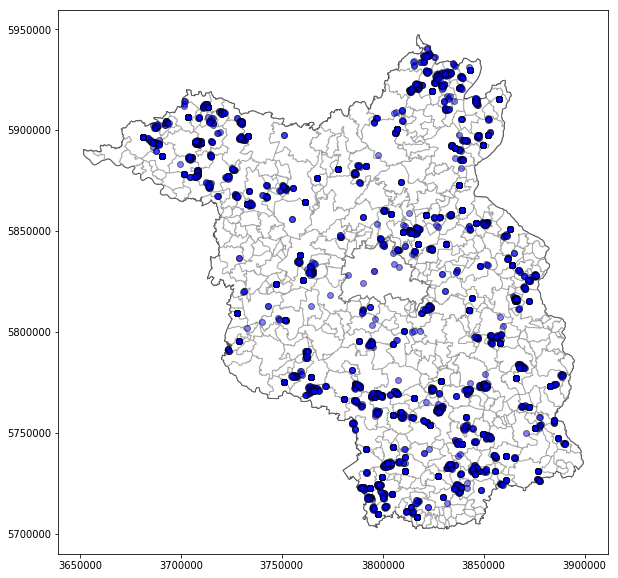

In [34]:
ax = df_lan_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_gem_region.plot(ax=ax, alpha=0.5, color='white', edgecolor='grey')
df_mastr_wind_region_gem.plot(ax=ax, alpha=0.5, color='blue', edgecolor='black')

In [35]:
df_agg = df_mastr_wind_region_gem.groupby('ags_0')['Bruttoleistung'].sum()
df_gem_region_sum = df_gem_region.join(df_agg, on='ags_0')
df_gem_region_sum.head()

,reference_date,id,ade,gf,bsg,rs,ags,sdv_rs,gen,bez,...,sn_v2,sn_g,fk_s3,nuts,rs_0,ags_0,wsk,debkg_id,geom,Bruttoleistung
194,2016-01-01,173,6.0,4.0,1.0,120620024024,12062024,120620024024,Bad Liebenwerda,Stadt,...,24,024,R,DE407,120620024024,12062024,2009-01-01,DEBKGDL20000E68A,(POLYGON ((3811618.776418203 5722365.241818016...,107625.0
204,2016-01-01,182,6.0,4.0,1.0,120705006280,12070280,120705006280,Meyenburg,Stadt,...,06,280,R,DE40F,120705006280,12070280,2009-01-01,DEBKGDL20000E0BV,(POLYGON ((3717089.243577976 5915303.920883838...,137750.0
205,2016-01-01,183,6.0,4.0,1.0,120705006153,12070153,120705006153,Halenbeck-Rohlsdorf,Gemeinde,...,06,153,R,DE40F,120705006153,12070153,2009-01-01,DEBKGDL20000E0BT,(POLYGON ((3718834.245492619 5909462.713774593...,26900.0
209,2016-01-01,186,6.0,4.0,1.0,120625207240,12062240,120625207240,Hohenleipisch,Gemeinde,...,07,240,R,DE407,120625207240,12062240,2009-01-01,DEBKGDL20000E2NT,(POLYGON ((3816445.353457158 5720906.802318151...,10000.0
247,2016-01-01,222,6.0,4.0,1.0,120695910402,12069402,120695910402,Mühlenfließ,Gemeinde,...,10,402,R,DE40E,120695910402,12069402,2009-01-01,DEBKGDL20000E21Y,(POLYGON ((3763173.707063624 5790849.239387363...,93900.0


/home/christianh/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


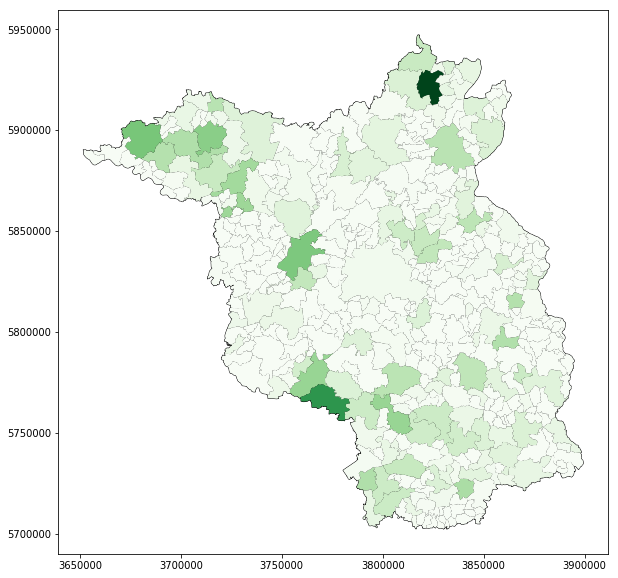

In [36]:
ax = df_gem_region.plot(figsize=(10, 10), color='white', edgecolor='black')
df_gem_region_sum.plot(column='Bruttoleistung', cmap='Greens', label='Capacity in MW', ax=ax)